<a href="https://colab.research.google.com/github/IgorQuaresma/bootcamp_alura_data_science/blob/main/Modulo1/Bootcamp_Mod1_Aulla3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

**Analisando Dados da Saúde com Python e Pandas**

In [2]:
import pandas as pd


In [3]:
dados = pd.read_csv("/content/A222426189_28_143_208.csv", encoding="ISO-8859-1",
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")

dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [4]:
#Formatar formato dos números. Sem ser notação científica
pd.options.display.float_format = "{:.2f}".format

In [5]:
dados['2008/Jan']

0       1829559.71
1       1731744.62
2      11419210.08
3        808448.39
4      21762104.16
5       1329876.61
6       5136474.61
7      21551600.33
8      11375419.37
9      32444328.54
10     11763899.23
11     16599004.84
12     51261210.58
13     16568724.64
14      5439985.99
15     73947845.87
16    206208080.90
17     16212109.41
18    251511992.03
19   1038067423.15
20     58081334.45
21     53034384.67
22     51064610.03
23      8301006.10
24      8213438.64
25     75039013.46
26     10561085.46
Name: 2008/Jan, dtype: float64

**Aula 3**

In [77]:
colunas_preenchidas = dados.mean().index.tolist()
colunas_preenchidas.insert(0, "Unidade da Federação")

In [78]:
usaveis = dados[colunas_preenchidas]

In [79]:
#Selecionar a coluna Unidade da Federação com índice 
usaveis = usaveis.set_index("Unidade da Federação")

In [80]:
#Retirar coluna total do dataset
usaveis = usaveis.drop("Total", axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2688315.70,2740952.07,247

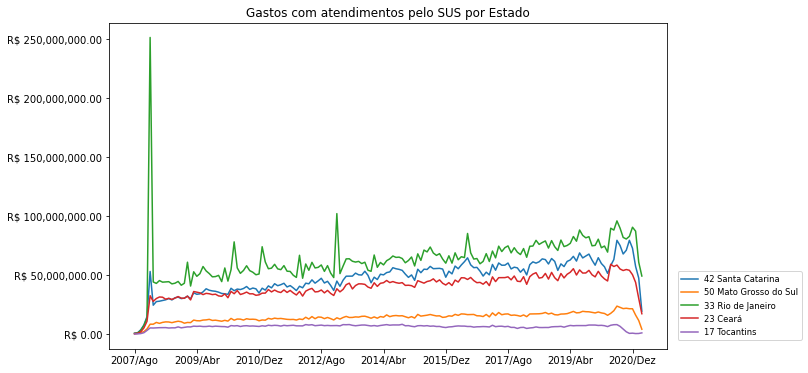

In [81]:
#Gráfico dos 5 estados selecionados aleatoriamente pela função sample (cada vez que o código for rodado um novo gráfico será desenvolvido)

colunas = usaveis.sample(n=5)

ax = colunas.T.plot(figsize=(10,6), title="Gastos com atendimentos pelo SUS por Estado")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
ax.legend(loc="upper center", fontsize="small", bbox_to_anchor=((0.88, -0.25,0.5, 0.5)))
plt.show()

Desafio 01: Escolher uma palete de cores mais adequada do matplotlib 

In [82]:
usaveis['Total'] = usaveis.sum(axis=1)

In [83]:
usaveis['Total']

Unidade da Federação
11 Rondônia                996410650.35
12 Acre                    450047246.65
13 Amazonas               1917245104.64
14 Roraima                 328876551.40
15 Pará                   4705290466.69
16 Amapá                   309837994.87
17 Tocantins              1019990254.88
21 Maranhão               3871010362.58
22 Piauí                  2280874839.37
23 Ceará                  6591825335.83
24 Rio Grande do Norte    2660065804.91
25 Paraíba                2614895825.09
26 Pernambuco             8580915668.43
27 Alagoas                2236401471.26
28 Sergipe                1215843416.10
29 Bahia                  9791496136.10
31 Minas Gerais          20418205467.78
32 Espírito Santo         3405838975.80
33 Rio de Janeiro        10337229379.18
35 São Paulo             41386533231.31
41 Paraná                14681341476.16
42 Santa Catarina         7834872054.38
43 Rio Grande do Sul     12764274442.95
50 Mato Grosso do Sul     2324515373.43
51 Mato Grosso     

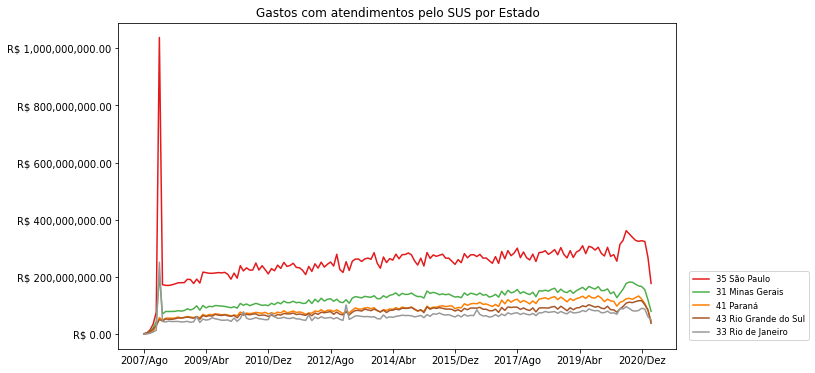

In [84]:
#Gráfico dos 5 estados selecionados pelo maior gasto total com os atendimentos

#Selecionar os 5 estados com os maiores gastos 
ordenados = usaveis.sort_values("Total", ascending=False).head()
ordenados = ordenados.drop("Total", axis=1)

ax = ordenados.T.plot(figsize=(10,6), title="Gastos com atendimentos pelo SUS por Estado", cmap=plt.get_cmap("Set1")) #Alterar pallete de cores
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
ax.legend(loc="upper center", fontsize="small", bbox_to_anchor=((0.88, -0.25,0.5, 0.5)))
plt.show()


Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.


In [92]:
#O campo de Unidade da Federação tem um número que identifica de qual região aquela unidade é.
#Começando com 1 = Norte, 2 = Nordeste, 3 = Sudeste, 4 = Sul, 5 = Centro-Oeste 

#Dicionário com os identificadores int e str
nomes_regioes = {1:"Norte", 2:"Nordeste", 3:"Sudeste", 4:"Sul", 5:"Centro-Oeste"}

#Criar uma coluna com os números identificadores das regiões  
usaveis['Regiao']  = usaveis.index.map(lambda x : int(x.split()[0][0]))

#Substituir os valores numéricos pelas strings com identificação das regiões
usaveis['Regiao'] = usaveis['Regiao'].map(nomes_regioes)




In [ ]:
usaveis.head(10)

,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4464307.47,4668642.02,4490368.23,4423840.08,4384430.09,4173529.95,4293085.61,4674947.02,5087527.81,4724192.54,4690112.05,4319488.17,4778472.22,4202805.84,4372265.77,4389025.81,4045339.34,4472721.53,4417486.20,4859795.35,4590008.82,4579463.54,4467858.99,4160296.03,4315005.38,4043314.46,4289759.65,4138600.85,3966744.30,4471693.32,4378412.90,5495946.92,5380890.26,5170015.34,4899586.21,5526959.19,5889685.39,6367552.03,6299844.72,6685861.76,...,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,1992821300.70,Norte
12 Acre,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,2749521.65,2473515.82,2801446.23,2672803.31,3135521.30,2719044.65,2814550.89,2923529.36,2804546.95,2773202.98,2711168.25,2765187.44,2804275.11,2460383.33,3062146.31,2780466.09,2811471.16,2813012.39,2946976.72,2801590.13,3089898.24,3049071.15,2858028.89,2642140.91,2774802.96,2650391.04,2813059.49,2906257.88,2893275.56,2687861.43,2940387.36,2895941.14,2824796.19,3034232.68,2682370.65,...,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,900094493.30,Norte
13 Amazonas,9437224.41,9742680.49,9996686.44,9532878.27,9335803.05,9800511.52,9461664.54,10954545.77,10529645.04,10105494.01,9966359.03,9972847.16,9965893.92,9861030.02,10206641.46,10735915.35,8702766.18,10037664.68,8977728.10,11048686.39,10472290.40,11490377.42,10677441.18,11010010.57,10766405.24,9569712.90,9989822.59,9957925.62,8918794.96,10855590.98,9429474.72,10170130.90,10539428.15,11110036.76,10467110.16,10400642.04,10851212.49,10420922.29,10599000.25,10244521.60,...,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,3834490209.28,Norte
14 Roraima,2046063.98,1939488.67,1757675.71,1528245.34,1485166.60,1604886.45,1220176.72,1276120.86,1379942.19,1679122.67,1770324.67,1646157.39,1656379.50,1802450.34,1856131.44,1655521.98,1620351.06,1605536.38,1625159.47,1768605.61,1589072.69,1982657.11,1782557.43,1743562.81,1822724.18,1637458.04,1374247.23,1613270.45,1586569.21,1712994.69,1483195.30,1783411.48,1713083.73,1724464.55,1965346.91,1835094.30,1816091.81,1741449.49,1779522.80

Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

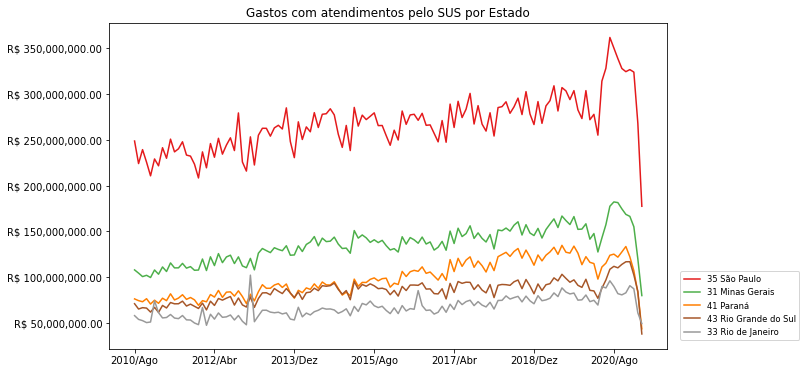

In [ ]:
#A fim de gerar o grafico desconsiderando o valor outlier no inicio de coleta dos dados. Faz-se um slicing nos primeiros registros disponiveis
colunas_interesse = usaveis.columns[6:]
usaveis =  usaveis[colunas_interesse]
usaveis.head()


#Gráfico dos 5 estados selecionados pelo maior gasto total com os atendimentos sem o outlier 

#Selecionar os 5 estados com os maiores gastos 
ordenados = usaveis.sort_values("Total", ascending=False).head()
ordenados = ordenados.drop("Total", axis=1)

ax = ordenados.T.plot(figsize=(10,6), title="Gastos com atendimentos pelo SUS por Estado", cmap=plt.get_cmap("Set1")) #Alterar pallete de cores
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
ax.legend(loc="upper center", fontsize="small", bbox_to_anchor=((0.88, -0.25,0.5, 0.5)))
plt.show()

Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente


In [ ]:
#Adicionando o DF aos 5 outros estados com maiores valores. (DF é onde moro atualmente)
estados_mais_df = usaveis.sort_values("Total", ascending = False).head().index.tolist()
estados_mais_df.append(usaveis.index[-1])
estados_mais_df

['35 São Paulo',
 '31 Minas Gerais',
 '41 Paraná',
 '43 Rio Grande do Sul',
 '33 Rio de Janeiro',
 '53 Distrito Federal']

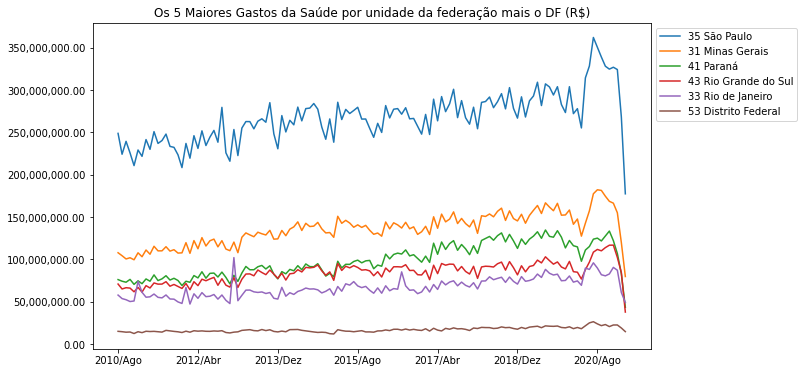

In [ ]:
#Fazer um filtro com a lista criada com os identificadores dos estados desejados


#Selecionar os 5 estados com os maiores gastos 
ordenados = usaveis.sort_values("Total", ascending=False)
ordenados = ordenados.drop("Total", axis=1)

ax = ordenados.loc[estados_mais_df].T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.legend(bbox_to_anchor = (1, 1))
plt.title("Os 5 Maiores Gastos da Saúde por unidade da federação mais o DF (R$)")
plt.show()

Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

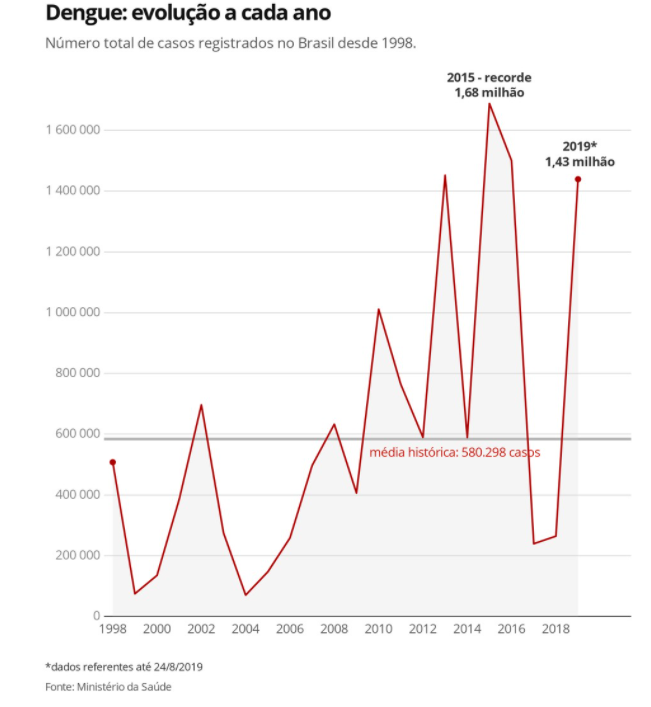

In [ ]:
from IPython.display import Image
filename = '/content/Capture.PNG'
Image(filename = filename, width=1000, height=1000)

O gráfico apresenta um pico dos casos de dengue entre os anos de 2010 a 2015, com 2015 apresentando o recorde de casos. Percebe-se também um outro pico no ano de 2019. Com o gráfico em questão não se pode fazer uma relação do aumento dos gastos com saúde, ou seja, os picos observados no gráfico e a incidência de casos de dengue, haja vista que o gráfico apresenta os resultados por ano e sem dividir por UF. Dependendo das medidas de combate de cada estado, o número de casos pode sofrer alterações. 

Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região


In [101]:
#Criando dataframe apenas com estados da regiao nordeste
sudeste = usaveis[usaveis["Regiao"] =="Sudeste"]
lista = sudeste.index.tolist()
sudeste

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00,20418205467.78,Sudeste
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25983304.03,28690916.87,25936888.97,28550512.79,29318260.49,27519132.91,29788885.15,26294165.36,25250918.87,27615604.26,26601451.82,26689904.87,24003052.09,29290756.45,31958199.08,41931102.65,36405257.36,34491126.71,34800541.67,35708727.33,40500910.57,33767261.13,25669612.63,15606368.11,3405838975.80,Sudeste
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,44111107.27,44359056.71,42500830.29,43066461.47,44553314.55,41351511.51,43024756.36,60885459.85,40668378.23,52753544.47,48916675.76,51177398.60,57241944.15,53485657.68,51244087.82,48489476.33,48689069.43,49708372.48,44413423.34,55993709.91,44833345.11,54473238.33,78128632.98,56028875.32,51435826.33,53873907.49,57867285.17,53736019.37,52379338.55,50242531.67,...,65060331.66,74428736.76,74579184.72,79419042.03,75991764.07,77576014.21,78916904.64,72869420.27,79188399.76,74018397.83,70831514.10,79663329.44,74142875.38,75063150.71,76859575.91,82670993.34,78689231.48,88182408.00,83624113.30,81561944.39,82534679.94,74778468.98,75149065.87,80411863.59,73147214.02,74595986.00,69437941.81,89725279.21,88135690.57,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48,10337229379.18,Sudeste
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,1909

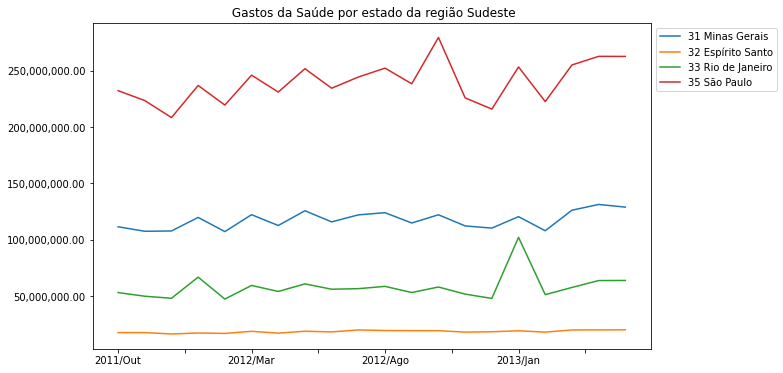

In [102]:
#Fazer grafico Gastos de saude por estado do Sudeste

sudeste = sudeste.iloc[:,50:70]
ax = sudeste.T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.legend(bbox_to_anchor = (1, 1))
plt.title(" Gastos da Saúde por estado da região Sudeste")
plt.show()

Os picos não tiveram o mesmo comportamento em todos estados da região sudeste. Para os estados de Minas Gerais, São Paulo e Rio de Janeiro há um aumento dos números de casos em jan/2013, o mesmo não ocorre para o estado do Espírito Santo. Ressalta-se que o estado de São Paulo tem um outro pico próximo dessa data. 